# NLP similarity and methods - first exploration of the vector space. 

## Content: 
- Readme
- Setup, tests
- Tokenization
- Doc strings
- Comprehensions
- On the numerical representation of natural language
- Bag of word
- [Dot product](#dot-product)
- Euclidean distance
- Length Normalization
- Cosine similarity
- TF-IDF
- Mini project: Finding the most similar document using cosine similarity and TF-IDF
- Mini project revisited: doing the same, just with professional libraries.
- About, credits, where to learn more, and so on. 

In [1]:
# Run this cell to make the math formulas larger.

from IPython.display import display, HTML

display(HTML('''
<style>
  .MathJax_Display, .MathJax {
    font-size: 250% !important;
  }
</style>
'''))

# thanks to chatgpt for the css 


# Readme

This is the first notebook of what I hope to be a series of notebooks, covering the curriculum of a course at UiO, in2110. 

In this notebook, we'll go through some of the basic concepts of algoirthms, and after that, we'll end with a small final project, demonstrating the algoritms.

The final project comes in two different versions, one using my own implementations and one using more professional libraries. The reason is that this will both teach me how to implement the algoirthms myself, but also how to use the standard libraries for these kind of tasks properly. 

I'll also go through a few topics that aren't directly relevant to NLP, but still quite useful (for instance, doc strings, comprehensions). 


# Setup and tests

## Requirements.txt
See requirements.txt

## Folder structure
TODO 

## How to run

- Create venv (recommended)

```bash
python -m venv NLP-venv
source ./NLP-venv/bin/activate
pip install -r requirements.txt

```
Install jupyer notebook: 
Follow instructions here: <link>

run jupyer notebook NLP-notebook.ipynb from root 


# Tokenization

## What is a token? 
- How many tokens is "New York" or "Celine Dion"? 
- Are puncts tokens or part of tokens? 
- Stop words 


## Tokens, types, lemmas 

## Ways of tokenizing

- split()
- using re
- using nltk
- writing your own: a bit hard. 



# Doc-strings 


## syntax 

## why use them? 

# Comprehensions

Comprehensions are a way to create lists, sets, dictionaries and generators in a more pythonic and concise way. 

The basic syntax is [expression for variable in iterable if condition]


While comprehensions aren't really a part of NLP in itself, it is so commonly used, both in my code and in others, that I 
think that it should be included in this notebook.

Example: 


In [ ]:
names = ["Bob", "Lars", "Celine"]

# lower only names beginning with B, include all names. 
names = [name.lower() if name[0] == "B" else name for name in names]
print(names)

# only include names longer than 3 chars

names_2 = [name for name in names if len(name) > 3]
print(names_2)

# We see here that the syntax in comprehensions using conditions can varry a bit, not sure why. 

['bob', 'Lars', 'Celine']


In [ ]:
# Flip a dictionary: 

phone_book = {

    "Bob": 12345678,
    "Lars" : 22222222, 
    "Celine" : 33333333
    
}

number_to_name_dict = {number : name for name, number in phone_book.items()}

print(number_to_name_dict)

# Notice that there is a possibility of losing data here, if two names are linked to the same number. 

{12345678: 'Bob', 22222222: 'Lars', 33333333: 'Celine'}


In [8]:
# Create a set from a list: 

fruit_list = ["apple", "apple", "banana"]

fruit_set = {fruit for fruit in fruit_list}
print(fruit_set)

# notice the different brackets and how they affect the type of the comprehension. 

{'apple', 'banana'}


In [13]:
# You can also do nested comprehensions, for instance to flatten a matrix. 

matrix = [[1, 2, 3],
          [2, 3, 4], 
          [3, 4, 5]]

flat_matrix = [v for vector in matrix for v in vector]
print(f"flat matrix: {flat_matrix}")

# or again, to return a set from a matrix: 

flat_set = {v for vector in matrix for v in vector}
print(f"flat set: {flat_set}")


flat matrix: [1, 2, 3, 2, 3, 4, 3, 4, 5]
flat set: {1, 2, 3, 4, 5}


In [1]:
import time 
import sys 
# Generators 

# Generators are iterables that yield objects one at the time when they are needed. I.e, they are a way of avoiding storing a large 
# iterable in memory, and rather just load just as much as you need when you need it. 
# You've probably already used generators like file.readline() and range already. 

# The syntax is quite similar to the other comprehensions, though the expression is enclosed in () rather than [] or {}

# Example: 

def square_10million_list_comprehension(): 
    """ Method for squaring  up to 10⁷ using a list comprehension. """
    start_time = time.time() 
    squares = [i**2 for i in range(10**7)] 
    end_time = time.time()
    elapsed_time = end_time - start_time
    memory_usage = sys.getsizeof(squares)
    print("List comprehension:")
    print(f"Elapsed time: {elapsed_time:.2f} seconds")
    print(f"Memory usage: {memory_usage:,} bytes (~{memory_usage / (1024**2):.2f} MB)")
 

# uncomment the next line to run the list comprehension
#square_10million_list_comprehension() 

# here is a generator version: 

def square_10million_generator(): 
    """ Method for squaring up to 10⁷ using a generator comprehension. """ 
    start_time = time.time() 
    squares = (i**2 for i in range(10**7)) 
    end_time = time.time()
    print("Generator")
    elapsed_time = end_time - start_time
    memory_usage = sys.getsizeof(squares)
    print(f"Elapsed time: {elapsed_time:.2f} seconds")
    print(f"Memory usage: {memory_usage:,} bytes (~{memory_usage / (1024**2):.2f} MB)")
    return squares

squares = square_10million_generator() 
 
# The generator has now been created, though nothing has yet been computed. 


# using the generator, getting the n first squares: 

n = 15

for _ in range(15): 
    print(next(squares))


# A final point is that generators can be exhausted: 

new_generator = (i for i in range(3)) 

n = 3 
# Uncomment the line bellow to ask the generator to yield more even after it's exhausted. 
# n = 4
for i in range(n): 
    print(next(new_generator)) 

# chatgpt help me think clearer about generators and provided the syntax for getting something out of a generator. 
# It also helped me to find a good way to find how much is loaded into the memory. 

# If this is a bit fuzzy, then hopefully it will be clearer for both you and I as we use generators in real problems further down the line. 





Generator
Elapsed time: 0.00 seconds
Memory usage: 200 bytes (~0.00 MB)
0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
0
1
2


# On the numerical representation of natural language, and what is a vector anyways? 


# Bag of words

<>:44: SyntaxWarning: invalid escape sequence '\w'
<>:44: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_930772/1065477171.py:44: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub("[^\w\s]", " ", text, flags=re.UNICODE)
[nltk_data] Downloading package punkt to /home/harald/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/harald/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


('ham', 36)
('heller', 35)
('gjøre', 34)
('ønsker', 29)
('tingene', 22)
('dersom', 21)
('fri', 20)
('må', 19)
('nei', 19)
('gjør', 18)
('annens', 17)
('kroppen', 16)
('andre', 16)
('under', 15)
('alt', 15)
('dine', 15)
('slave', 14)
('gi', 14)
('underlagt', 13)
('kontroll', 12)
('annen', 12)
('gitt', 12)
('ting', 11)
('se', 11)
('sier', 11)


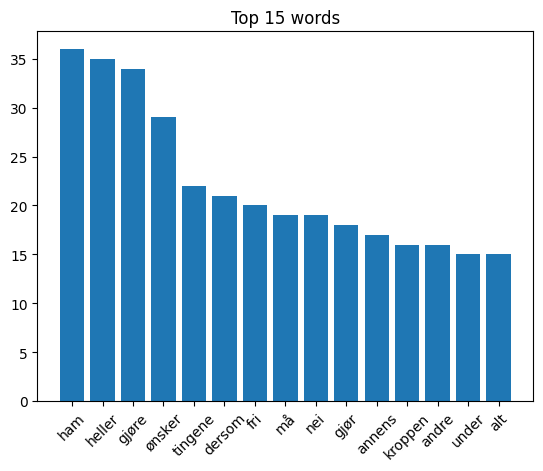

In [2]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download("punkt")
nltk.download("stopwords")

stopwords = set(stopwords.words("norwegian"))
#print(stopwords)



def main():
    with open("epiktet-frihet.txt", "r", encoding="utf-8") as f: 
        sample = f.read()
        sample = preprocess(sample)



    counter_dict = Counter(word_tokenize(sample))
    sorted_counter_dict = counter_dict.most_common(25)

    for k in sorted_counter_dict: 
        print(k)

    
    visualize(counter_dict)
    
def preprocess(text : str) -> str: 
    """
    Removes html-tags from text.
    
    Args: 
        text (str): the input text.
        
    Returns: 
        cleaned_text (str): the cleaned text.
    """
    text = re.sub("<.*?>", "", text)
    text = re.sub("[^\w\s]", " ", text, flags=re.UNICODE)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return " ".join(words)


def visualize(counter_dict : Counter) -> None:
    most_common = counter_dict.most_common(15)
    words, freq = zip(*most_common)
    
    plt.bar(words, freq)
    plt.xticks(rotation=45)
    plt.title("Top 15 words")
    plt.savefig("plot.jpg")
    
    wordcloud = WordCloud().generate_from_frequencies(counter_dict)
    wordcloud.to_file("kvakk.jpg")
    
main()


# Dot-product

The forumla for finding the dot product is the following: 

$a \cdot b =\sum_{i=0}^{n - 1}(a_ib_i)$


In other words, for each feature in vector a and b, take the sum of the product of feature i in vector a with feature i in vector b from index 0 to the last index of the vectors. (Where we count index 0 as the first index of a vector.) The algorithm assumes that the vectors are of equal length. 

Example: 

a = [1, 2, 3]

b = [2, 2, 2]

dot product = ((1 * 2) + (2 * 2) + (3 * 2) ) = 12

Example 2: 

a = [1, 1, 7]

b = [2, 3, 6]

dot product = ((1 * 2) + (1 * 3) + (7 * 6) ) = 47


Example 3: 

a = [0]

b = [1]

dot product = 0 * 1 = 0


Here is an implementation in Python, meant to be readable. 


In [9]:
def dot_product(vector1: list[float], vector2 : list[float]) -> float :
    """
    A method for finding the dot product of two vectors.
    
    Args: 
        vector1 (list[float]): a list representing a vector.
        vector2 (list[float]): a list representing a different vector. 
        
    Returns: 
        sum (float): the sum of the calculation.
        
    Raises: 
        ValueError: If the vectors are not of the same length. 
    """
    
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
        
    
    total = 0 
    for v1, v2 in zip(vector1, vector2): 
        total += (v1 * v2)
    return total

print(f"Dot product, [1, 2, 3], [2, 2, 2] = {dot_product([1, 2, 3], [2, 2, 2])}" )
print(f"Dot product, [1, 1, 7], [2, 3, 6] = {dot_product([1, 1, 7], [2, 3, 6])}" )
print(f"Dot product, [0], [1] = {dot_product([0], [1])}" )






Dot product, [1, 2, 3], [2, 2, 2] = 12
Dot product, [1, 1, 7], [2, 3, 6] = 47
Dot product, [0], [1] = 0


# Euclidean distance

The Euclidean distance between two vectors **a** and **b** is calculated as:

$$
d(a, b) = \sqrt{\sum_{i=1}^{n}(a_i - b_i)^2}
$$

Let's do a few examples: 

let v1 be [1] and v2 be [2] 

Then the Euclidean distance between v1 and v2 would be: 

$ \sqrt{1 - 2}² = \sqrt{(-1)²} = \sqrt{1} = 1 $ 


Let's do another, v1 = [1.2, 3.0] and v2 = [4.5, 0.2] 

$ \sqrt((1.2 - 4.5)² + (3.0 - 0.2)²) = \sqrt((-3.3)² + (2.8)²) = $ 
$ \sqrt(10.89 + 7.84) = \sqrt(18.74) = 4.3278 $ 

Let's do a weird one: v1 = [0] v2 = [0] 

$ \sqrt((0 - 0)²) = \sqrt(0) = 0 $ 

Notice that the formula demands that the vectors are of the same length. 



We can calculate this in a very straightforward way in Python like this: 


In [14]:
import math 

def euclidean_distance(
        vector1: list[float], vector2 : list[float]
        ) -> float :
    """ 
    Method for calculating the euvlidean distance between two vectors.

    Args: 
        vector1 (list[float]) : a vector.
        vector2 (list[float]): another vector

    Returns: 
        the result (float) of the calculation. 
    """

    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
            
        
    total = 0 
    for v1, v2 in zip(vector1, vector2): 
        total += (v1 - v2)**2
    return math.sqrt(total)

# Or with a generator comprehension


def euclidean_distance_comp(vector1, vector2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(vector1, vector2)))

print(euclidean_distance([1], [2]))
print(euclidean_distance_comp([1.2, 3.0], [4.5, 0.2]))
print(euclidean_distance([0], [0]))

1.0
4.32781700167648
0.0


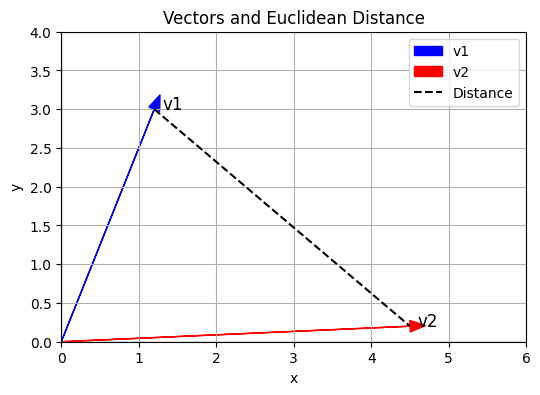

In [6]:
# And we can visualize the Euclidean distance between ,[1.2, 3.0] and [4.5, 0.2] like this:

import matplotlib.pyplot as plt

# Define vectors
v1 = [1.2, 3.0]
v2 = [4.5, 0.2]

# Set up the plot
plt.figure(figsize=(6, 6))
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Plot arrows from origin
plt.arrow(0, 0, v1[0], v1[1], head_width=0.15, head_length=0.2, fc='blue', ec='blue', label='v1')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.15, head_length=0.2, fc='red', ec='red', label='v2')

# Plot the dashed distance line between vector tips
plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color='black', linestyle='dashed', label='Distance')

# Annotate vector tips
plt.text(v1[0] + 0.1, v1[1], 'v1', fontsize=12)
plt.text(v2[0] + 0.1, v2[1], 'v2', fontsize=12)

# Axis settings
plt.xlim(0, 6)
plt.ylim(0, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vectors and Euclidean Distance')
plt.legend()
plt.gca().set_aspect('equal')  # Keep aspect ratio square
plt.show()



# Length normalization

$$\frac{x}{||x||}$$ for each element x in vector v, or 

$$
\frac{x}{\|x\|} = \left[\frac{x_1}{\|x\|}, \frac{x_2}{\|x\|}, \dots, \frac{x_n}{\|x\|} \right]
$$

**Length of a vector**
$$||x|| = \sqrt{x \cdot x} = \sqrt{\sum_{i=1}^nx_i^2}$$

So, there are two formulas to understand here, one for finding the length of a vector, and one for length normalizing a vector.

We find the length of a vector by taking the square root of the sum of the squared elements of the vector. 

So for the vector [0, 1, 2] the length would be: 

$ \sqrt((0)² + (1)² + (2)²) = \sqrt(0 + 1 + 4) = \sqrt(5) = 2.236067977  $ 

Or for the vector [2, 2] the length would be: 

$ \sqrt((2)² + (2)²) = \sqrt(4 + 4) = \sqrt(8) = 2.828427125 $ 

After that, we length normalize the vector by dividing each of the elements in the vector by the length of the vector. 
So returning to the two examples, the length normalized vector [0, 1, 2]

would be [(0 / 2.236067977), (1 / 2.236067977), (2 / 2.236067977)] which is [0, 0.447213596, 0.894427191] 

The length normalized vector of vector [2, 2] is [(2 / 2.828427125), (2 / 2.828427125) ] which is [0.707106781, 0.707106781] 




In [4]:
import math

def length_normalization(vector: list[float]) -> list[float] :
    """
    A method for normalizing a vector.
    
    Args: 
        vector1 (list[float]): a list representing a vector.
         
        
    Returns: 
        normalized_vector (list[float]): the sum of the calculation.
        
    Raises: 
        ValueError: If it is a zero-length vector. 
    """
    
 
    
    total = 0
    for element in vector: 
        total += element ** 2
    length = math.sqrt(total)
    
    if length == 0: 
        raise ValueError("cannot normalize a zero-length vector")
    normalized_vector = [x/ length for x in vector]

    return normalized_vector

doc1star, doc2star = length_normalization([2,1]), length_normalization([10, 5])
print(doc1star, doc2star) 

[0.8944271909999159, 0.4472135954999579] [0.8944271909999159, 0.4472135954999579]


We length normalize vectors partly to make them easier to compute, but also to focus on the direction of a vector rather than 
on its magnitude. This can be particularly useful when we work with a corpus of varying length of the corpus. 

Let's imagine the really weird corpus consisting of doc1 = [dog, dog, cat] and doc 2 [dog * 10, cat * 5] 

We can then draw up a vector space representation of this corpus as follows: 

We have two words in the vocabulary, therefore we can represent the vectors on a coordinate system with two axes, x for dog and y for cat. doc 1 would then be [2, 1] and doc 2 would be [10, 5]

When we length normalize them we get doc 1* = [0.8944271909999159, 0.4472135954999579]  and doc 2* = [0.8944271909999159, 0.4472135954999579]. 

We can see that they are the same. This becomes even clearer with a visualization: 


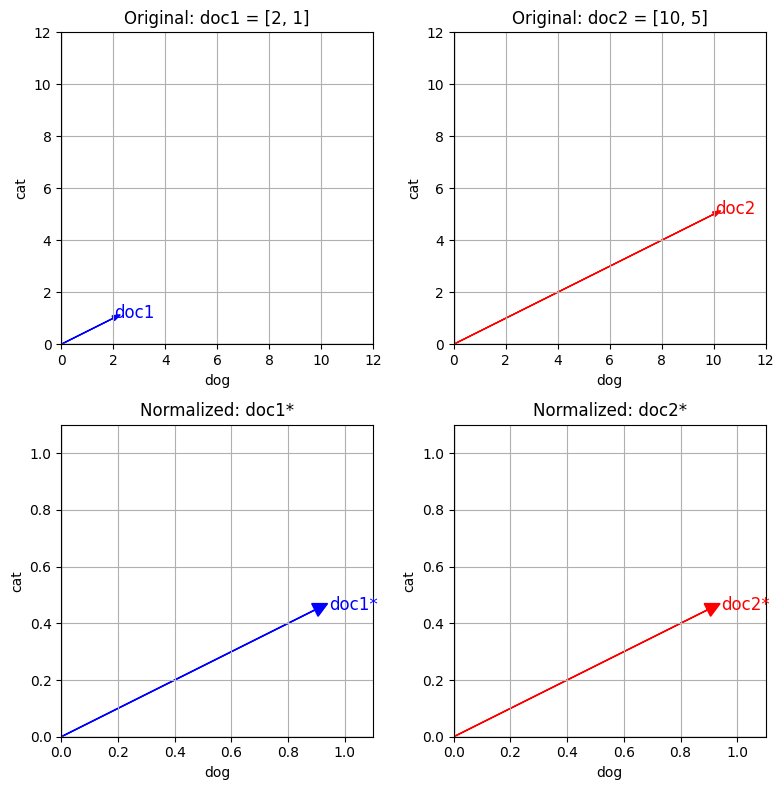

In [17]:
import matplotlib.pyplot as plt

# Original vectors
doc1 = [2, 1]
doc2 = [10, 5]

# Normalized vectors
doc1s = length_normalization(doc1)
doc2s = length_normalization(doc2)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

def plot_vector(ax, vector, label, color, title):
    ax.grid(True)
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.arrow(0, 0, vector[0], vector[1],
             head_width=0.05 if max(vector) < 1 else 0.2,
             head_length=0.05 if max(vector) < 1 else 0.3,
             fc=color, ec=color)
    ax.text(vector[0] + 0.05, vector[1], label, fontsize=12, color=color)
    ax.set_xlim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_ylim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_aspect('equal')
    ax.set_xlabel('dog')
    ax.set_ylabel('cat')
    ax.set_title(title)

plot_vector(axs[0, 0], doc1, 'doc1', 'blue', 'Original: doc1 = [2, 1]')
plot_vector(axs[0, 1], doc2, 'doc2', 'red', 'Original: doc2 = [10, 5]')
plot_vector(axs[1, 0], doc1s, 'doc1*', 'blue', 'Normalized: doc1*')
plot_vector(axs[1, 1], doc2s, 'doc2*', 'red', 'Normalized: doc2*')

plt.tight_layout()
plt.show()


The plots makes it clear that they are both pointing in the same direction, and in fact, they are the same vectors when they are normalized. This will be important when we turn to cosine similarity. For comparison, here is a visualization of two disimilar vectors: 

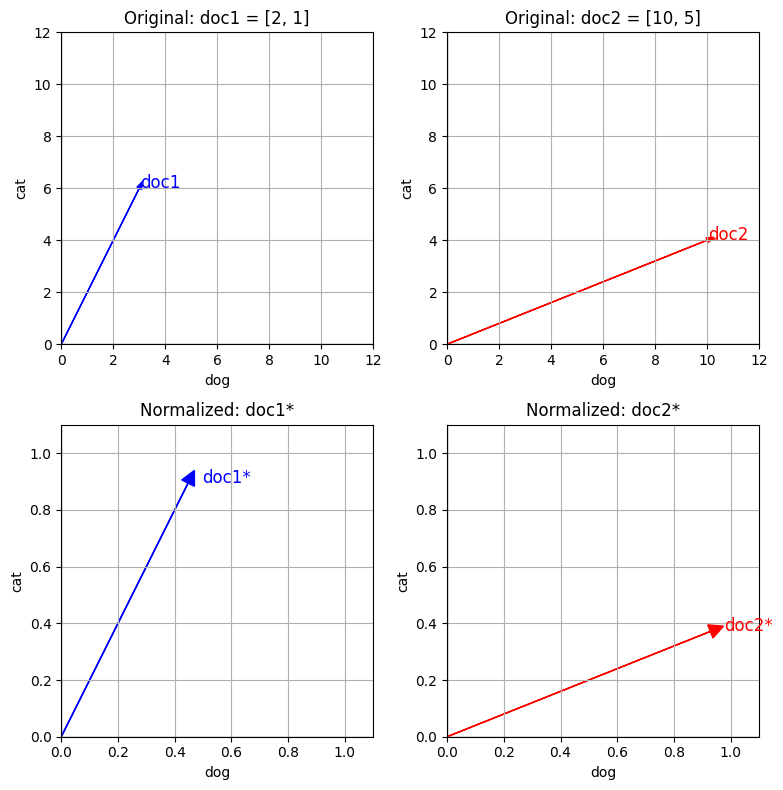

In [18]:
import matplotlib.pyplot as plt

# Original vectors
doc1 = [3, 6]
doc2 = [10, 4]

# Normalized vectors
doc1s = length_normalization(doc1)
doc2s = length_normalization(doc2)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

def plot_vector(ax, vector, label, color, title):
    ax.grid(True)
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.arrow(0, 0, vector[0], vector[1],
             head_width=0.05 if max(vector) < 1 else 0.2,
             head_length=0.05 if max(vector) < 1 else 0.3,
             fc=color, ec=color)
    ax.text(vector[0] + 0.05, vector[1], label, fontsize=12, color=color)
    ax.set_xlim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_ylim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_aspect('equal')
    ax.set_xlabel('dog')
    ax.set_ylabel('cat')
    ax.set_title(title)

plot_vector(axs[0, 0], doc1, 'doc1', 'blue', 'Original: doc1 = [2, 1]')
plot_vector(axs[0, 1], doc2, 'doc2', 'red', 'Original: doc2 = [10, 5]')
plot_vector(axs[1, 0], doc1s, 'doc1*', 'blue', 'Normalized: doc1*')
plot_vector(axs[1, 1], doc2s, 'doc2*', 'red', 'Normalized: doc2*')

plt.tight_layout()
plt.show()


# Cosine similarity

TODO - everything

# A metanote on similarity - how similarity depends on the context. 

I think this is a good place to pause and take a more meta-level view of what we're doing.

We'll use these algorithms to try to say something about how similar one document is to another — but what do we really mean by "similarity"?

First of all, context matters. What we're doing with these algorithms is trying to calculate how similar doc 1 is to doc 2, based on a model trained on a specific corpus — and the corpus matters for determining the similarity.

Suppose we compare two docs, 1 and 2, using cosine similarity and a pretrained model based on TF-IDF. The result might vary quite a bit depending on what corpus the model was trained on. What happens when doc 1 contains several words that aren't in the vocabulary? Usually, we just discard them.

Secondly, another point to consider is that these algorithms — unlike some others that we’ll cover in a later notebook — don’t look at semantic similarity, but focus more on pure word counts.

So, "the malodorous feline" and "the smelly cat" would probably not be considered similar using these approaches, but might be considered similar if we use something like Word2Vec.

More on that in a future notebook. 

(I got the phrase maloderous feline from a question card in Trivial Pursuit). 

In [2]:
def cosine_similarity(vector1: list[float], vector2 : list[float]) -> float :
    """
    A method for finding the cosine similarity of two vectors.
    
    Args: 
        vector1 (list[float]): a list representing a vector.
        vector2 (list[float]): a list representing a different vector. 
        
    Returns: 
        dotproduct (float): the dot product of the normalized vectors.
        
    Raises: 
        ValueError: If the vectors are not of the same length. 
    """
    
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
    if all(v == 0 for v in vector1) or all(v == 0 for v in vector2): 
        return 0.0
        
    
    vector1_normalized = length_normalization(vector1)
    vector2_normalized = length_normalization(vector2)
    
    return dot_product(vector1_normalized, vector2_normalized)

#TODO add examples




# TF-IDF

In [ ]:
import math
from nltk.tokenize import word_tokenize



def term_frequency(term : str, document: str) -> int:
    """
    Find term frequency in a document. 
    
    Args: 
        term (str): the term in question.
        document (str): the document, represented as a str.
        
    Returns:
        frequency (int): the count of term in document.

    """ 
    assert isinstance(document, str)
    words_in_doc = tokenize(document)
    count = 0
    
    for word in words_in_doc: 
        if word == term.lower():
            count += 1
    return count
    
    
    


def document_frequency(term: str, documents: list[str]) -> int: 
    """
    Find the num of docs that contains the term. 
    
    Args: 
        term (str): the term.
        documents (list[str]): the documents of the corpus.
        
    Returns: 
        Frequency (int): the num of occurrences of term in the documents.
    
    """
    assert isinstance(documents, list)
    assert len(documents) > 0
    assert isinstance(documents[0], str)
    count = 0
    for doc in documents: 
        tokenized = word_tokenize(doc)
        tokenized = [word.lower() for word in tokenized]
        if term.lower() in tokenized: 
            count += 1
            
    return count



def inverse_document_frequency(term: str, documents: list[str]) -> float: 
    """
    Finds the inverse document frequency of the term.
    
    Args: 
        term (str): the term.
        documents (list[str]): the documents.
        
    Returns:
        The inverse document frequency of the term.

    
    """
    assert isinstance(term, str)
    assert isinstance(documents, list)
    assert len(documents) > 0
    assert isinstance(documents[0], str)
    
    
    N = len(documents)
    df = document_frequency(term, documents)
    
    
    return math.log(N / (1 + df))


def tf_idf(term: str, single_document: str, documents: list[str]) -> float: 
     
    #
    """
    Returns term frequency * inverse document frequency.
    
    Args: 
        term (str): the term you're trying to find the tf-idf for.
        single_document (str): the document you're trying to find the tf-idf for.
        documents (list[str]): the whole corpus.
        
    Returns: 
        tf-idf (float): the tf-idf based on the input.
        
        
    """
    
    assert isinstance(term, str)
    assert isinstance(single_document, str)
    assert isinstance(documents, list)
    assert len(documents) > 0    
    assert isinstance(documents[0], str)
   
    
    return term_frequency(term, single_document) * inverse_document_frequency(term, documents)


def tokenize(doc: str) -> list[str]:
    return [word.lower() for word in word_tokenize(doc) if word.isalnum()]



# Mini project

# Mini project - using external libraries.

# About, credits and so on. 

## How have I used LLMs

## Where can you read more about these concepts? 

## How do I draw on In2110 